In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [18]:
import warnings
warnings.filterwarnings('ignore') 

In [43]:
from scipy.stats import norm

In [19]:
df1 = pd.read_csv('Lab_customer_analysis_round_2.csv')

In [20]:
#df1.columns

In [21]:
df1 = df1.drop(columns = ['Unnamed: 0', 'effective_to_month'])
df1

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,PB63095,Washington,5568.947534,Yes,Extended,High School or Below,2011-01-01,Unemployed,M,0,...,53,1,7,Personal Auto,Personal L2,Offer1,Agent,407.440238,Two-Door Car,Medsize
1,XJ97760,California,4739.861234,No,Basic,Master,2011-01-01,Employed,M,35039,...,87,0,8,Personal Auto,Personal L1,Offer1,Call Center,254.308991,Four-Door Car,Medsize
2,RA27021,Nevada,27564.739510,No,Extended,Bachelor,2011-01-01,Disabled,F,26410,...,90,0,2,Corporate Auto,Corporate L1,Offer2,Agent,184.516188,Four-Door Car,Large
3,OG30514,Nevada,20018.204590,No,Basic,Bachelor,2011-01-01,Employed,F,65900,...,41,0,2,Personal Auto,Personal L3,Offer1,Agent,297.600000,Four-Door Car,Medsize
4,GJ44951,Washington,4698.759935,No,Basic,Bachelor,2011-01-01,Unemployed,F,0,...,71,0,6,Personal Auto,Personal L2,Offer1,Agent,321.600000,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,XA55917,California,8533.832013,No,Basic,College,2011-02-28,Disabled,F,26049,...,15,1,9,Personal Auto,Personal L1,Offer1,Web,619.165344,SUV,Medsize
9130,KM65135,Oregon,4763.327142,No,Basic,College,2011-02-28,Disabled,M,14957,...,68,0,8,Corporate Auto,Corporate L3,Offer1,Branch,316.800000,Four-Door Car,Small
9131,EB61889,California,9486.037005,No,Extended,High School or Below,2011-02-28,Medical Leave,M,25322,...,52,0,3,Corporate Auto,Corporate L3,Offer3,Call Center,886.033554,Sports Car,Medsize
9132,SB83749,California,4717.628730,No,Basic,High School or Below,2011-02-28,Employed,M,20355,...,6,1,3,Personal Auto,Personal L1,Offer2,Branch,439.200000,Four-Door Car,Large


In [22]:
#Check the data types of the columns
df1.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [23]:
# Get the numeric data into dataframe called numerical [...] 

In [24]:
numerical = df1.select_dtypes(include=np.number)
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,5568.947534,0,79,21,53,1,7,407.440238
1,4739.861234,35039,61,7,87,0,8,254.308991
2,27564.739510,26410,91,17,90,0,2,184.516188
3,20018.204590,65900,62,17,41,0,2,297.600000
4,4698.759935,0,67,27,71,0,6,321.600000
...,...,...,...,...,...,...,...,...
9129,8533.832013,26049,113,10,15,1,9,619.165344
9130,4763.327142,14957,66,24,68,0,8,316.800000
9131,9486.037005,25322,126,23,52,0,3,886.033554
9132,4717.628730,20355,61,4,6,1,3,439.200000


In [25]:
# [...] and categorical columns in a dataframe called categoricals
categoricals = df1.select_dtypes(include=np.object)
categoricals

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,PB63095,Washington,Yes,Extended,High School or Below,2011-01-01,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Agent,Two-Door Car,Medsize
1,XJ97760,California,No,Basic,Master,2011-01-01,Employed,M,Urban,Single,Personal Auto,Personal L1,Offer1,Call Center,Four-Door Car,Medsize
2,RA27021,Nevada,No,Extended,Bachelor,2011-01-01,Disabled,F,Rural,Married,Corporate Auto,Corporate L1,Offer2,Agent,Four-Door Car,Large
3,OG30514,Nevada,No,Basic,Bachelor,2011-01-01,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
4,GJ44951,Washington,No,Basic,Bachelor,2011-01-01,Unemployed,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Agent,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,XA55917,California,No,Basic,College,2011-02-28,Disabled,F,Suburban,Married,Personal Auto,Personal L1,Offer1,Web,SUV,Medsize
9130,KM65135,Oregon,No,Basic,College,2011-02-28,Disabled,M,Suburban,Single,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Small
9131,EB61889,California,No,Extended,High School or Below,2011-02-28,Medical Leave,M,Suburban,Divorced,Corporate Auto,Corporate L3,Offer3,Call Center,Sports Car,Medsize
9132,SB83749,California,No,Basic,High School or Below,2011-02-28,Employed,M,Suburban,Married,Personal Auto,Personal L1,Offer2,Branch,Four-Door Car,Large


In [26]:
# Use seaborn library to construct distribution plots for the numerical variables

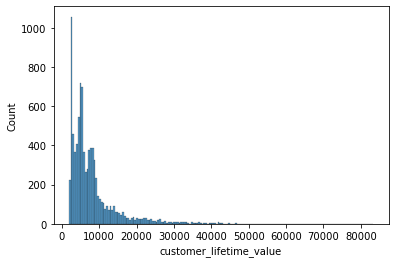

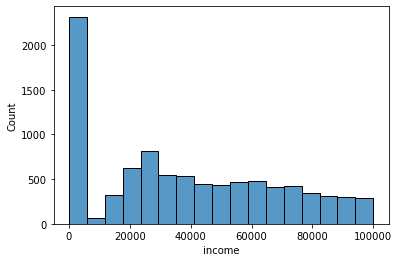

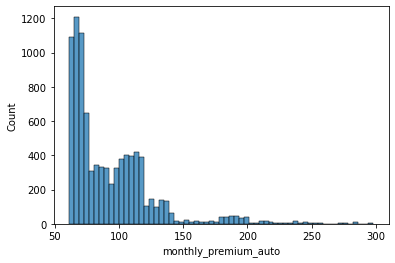

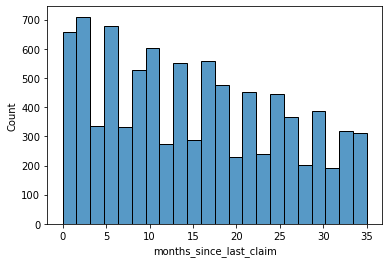

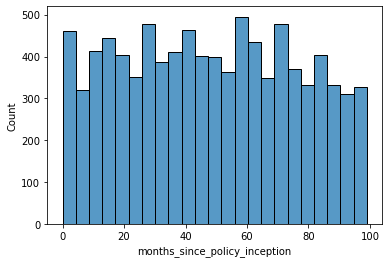

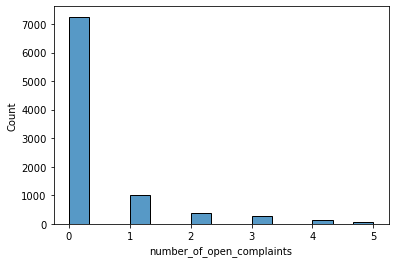

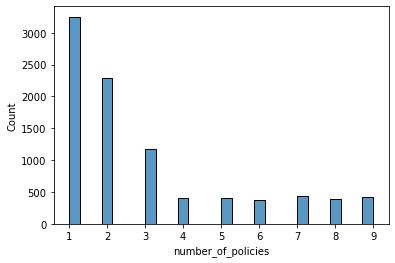

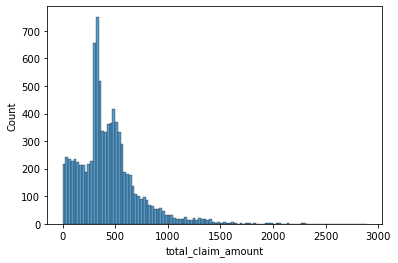

In [42]:
for column in numerical.columns:
    sns.histplot(numerical[column])
    plt.show()

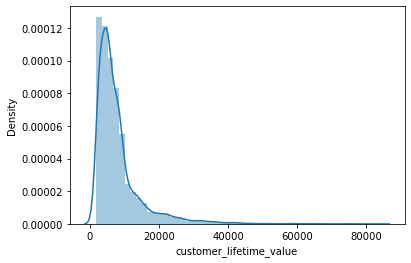

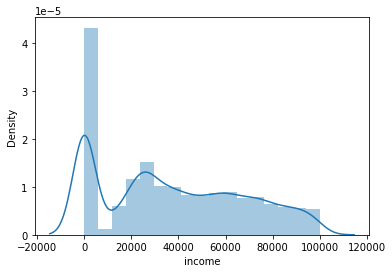

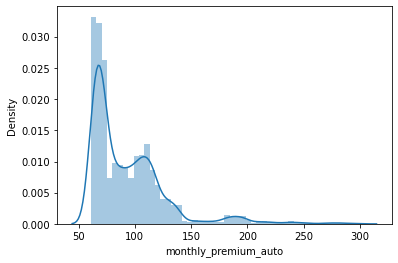

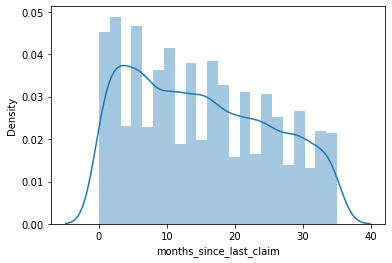

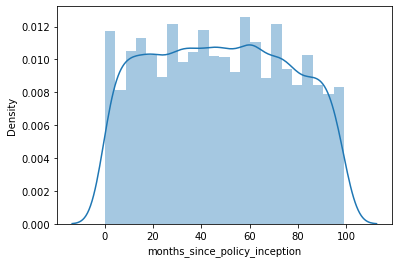

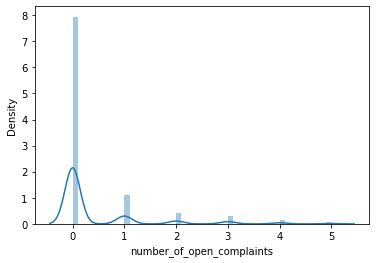

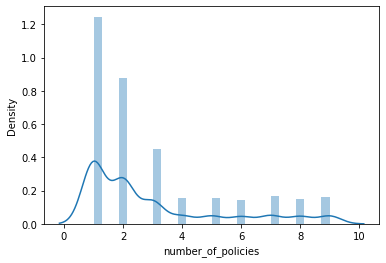

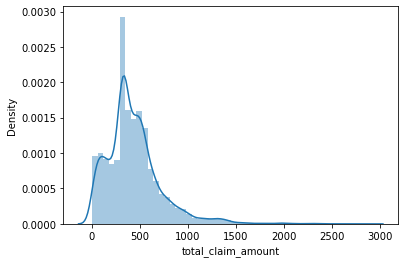

In [41]:
for column in numerical.columns:
    sns.distplot(numerical[column])
    plt.show()

In [ ]:
# Use Matplotlib to construct histograms:

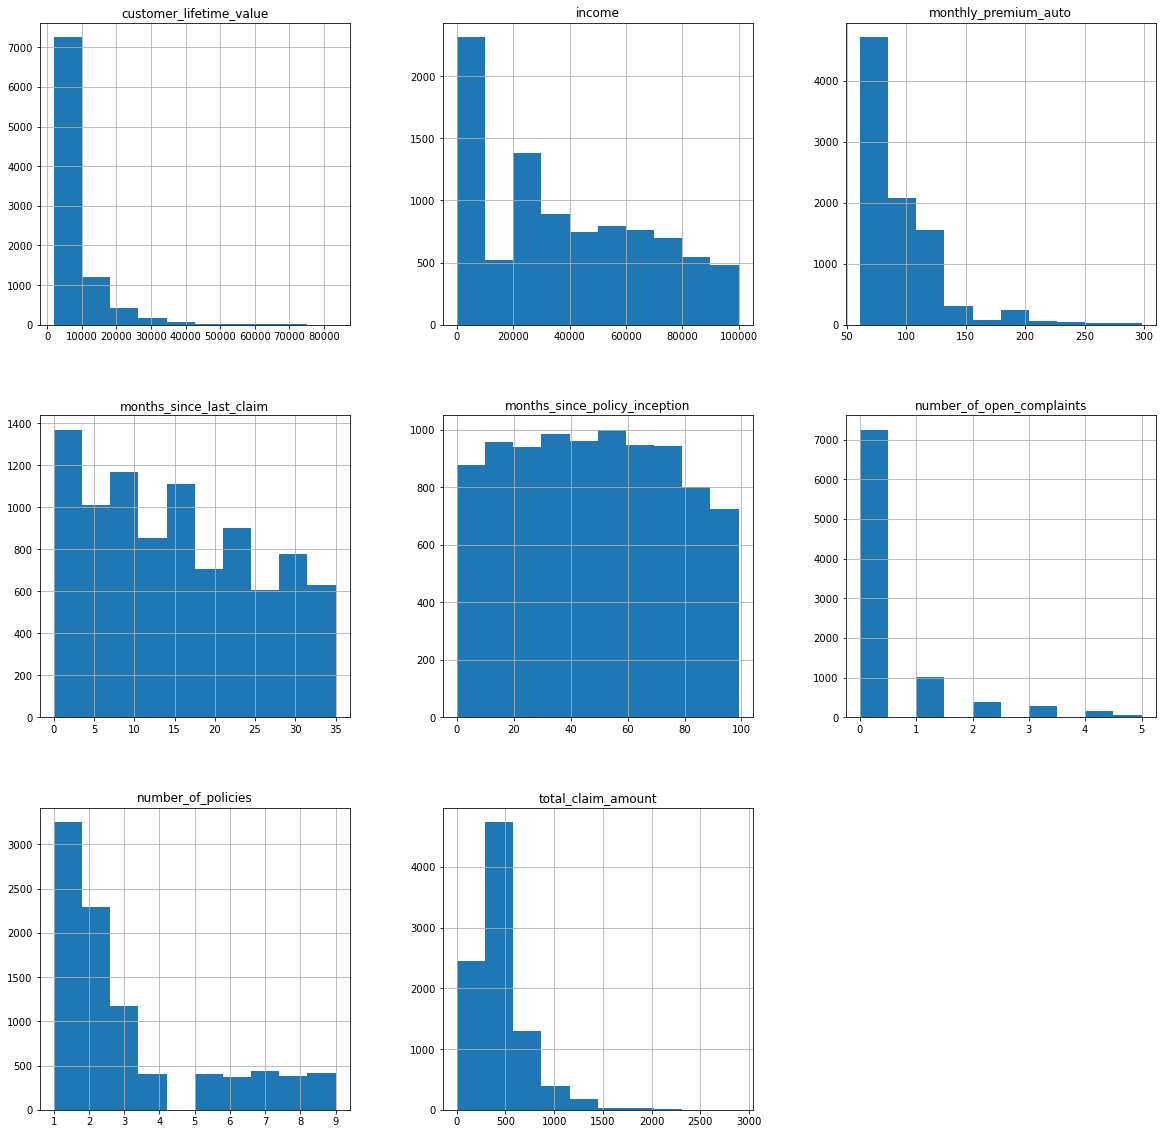

In [38]:
numerical.hist(xlabelsize = 10, ylabelsize = 10, figsize = (20,20))
plt.show()

In [ ]:
# For the numerical variables, check the multicollinearity between the features. 
# Please note that we will use the column total_claim_amount later as the target variable.

In [44]:
numerical_corr = numerical.corr()
numerical_corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


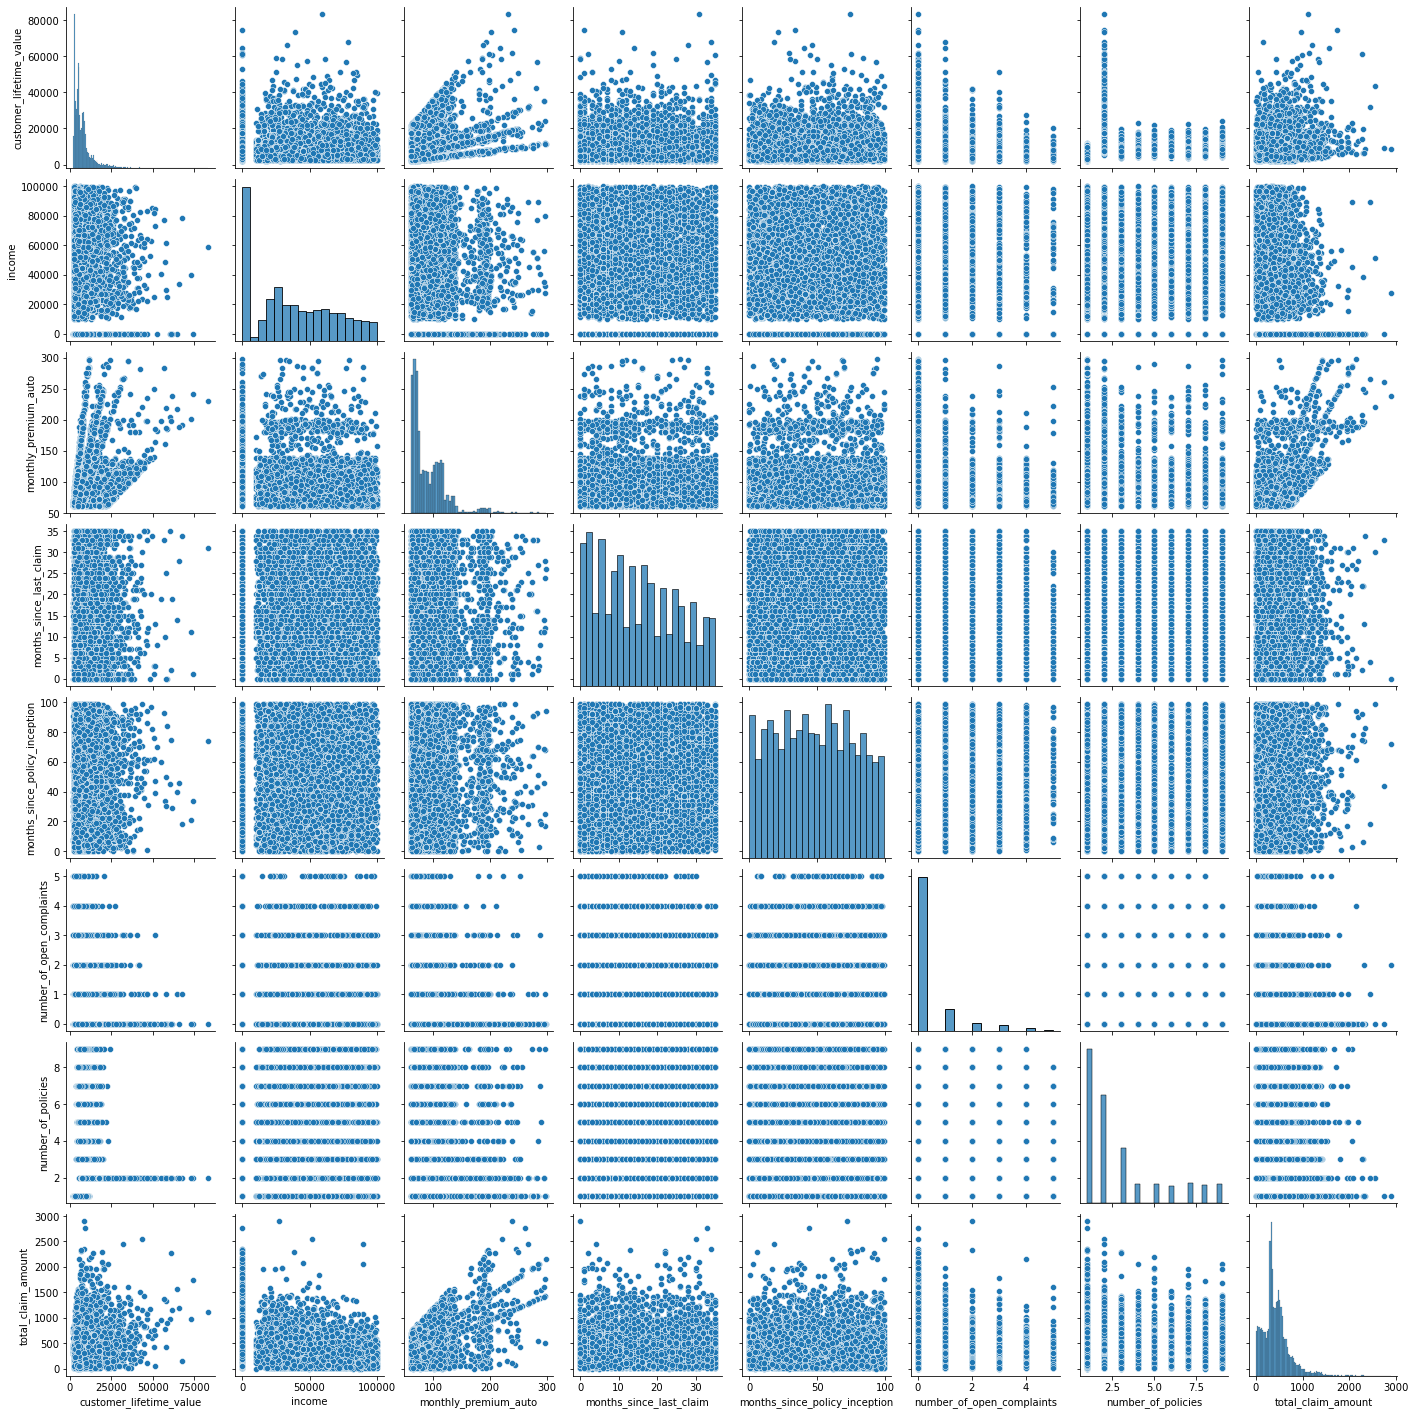

In [45]:
sns.pairplot(numerical)
plt.show()

In [ ]:
#Drop one of the two features that show a high correlation between them (greater than 0.9). 
#Write code for both the correlation matrix and for seaborn heatmap. 
#If there is no pair of features that have a high correlation, then do not drop any features

In [90]:
#df2 = df1.copy()

In [ ]:
#sns.scatterplot(y, blabla)